as
a
s
A

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv("fashion-mnist_train.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


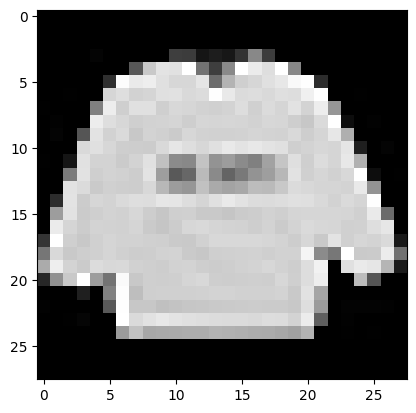

In [43]:
plt.imshow(np.array(df.iloc[0, 1:]).reshape(28, 28), cmap="gray");

In [44]:
df = np.array(df)
m, n = df.shape
np.random.shuffle(df)
df.shape

(60000, 785)

In [45]:
X = df[:, 1:]
X = X.T // 255.
y = df[:, 0]

X_train, X_test = X[:, :50_000], X[:, 50_000:]
y_train, y_test = y[:50_000], y[50_000:]

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(784, 50000) (784, 10000)
(50000,) (10000,)


In [46]:
def init_params():
    W1 = np.random.rand(40, 784) - 0.5
    b1 = np.random.rand(40, 1) - 0.5
    W2 = np.random.rand(10, 40) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X)
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1)
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2)
    A3 = softmax(Z3)

    return Z1, A1, Z2, A2, Z3, A3


def one_hot_encode(y):
    Y = np.zeros((y.size, y.max() + 1))
    Y[np.arange(y.size), y]

    return Y.T


def der_relu(Z):
    return Z > 0


def back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, y):
    Y = one_hot_encode(y)
    dZ3 = A3 - Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)

    dZ2 = der_relu(Z2) * W3.T.dot(dZ3)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    dZ1 = der_relu(Z1) * W2.T.dot(dZ2)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)

    return dW1, db1, dW2, db2, dW3, db3


def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3

    return W1, b1, W2, b2, W3, b3


def pred(A3):
    return np.argmax(A3, 0)

def accuracy(pred, y):
    return np.sum(pred == y) / y.size

def gradient_descent(X, y, iters=500, alpha=0.1):
    W1, b1, W2, b2, W3, b3 = init_params()

    for i in range(iters):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = back_prop(Z1, A1, Z2, A2, Z3, A3, W2, W3, X, y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)

        if i % 10 == 0:
            prediction = pred(A3)
            print(f"Iter: {i}: {accuracy(prediction, y)}")

    return W1, b1, W2, b2, W3, b3



In [47]:
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train, y_train)

Iter: 0: 0.10048
Iter: 10: 0.10234
Iter: 20: 0.10456


KeyboardInterrupt: 